In [35]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import io
from fermipy import utils

Como o Ts impacta os limites de seção de choque?



Bom, os limites de seção de choque são influenciados por varios fatorres, um deles é o fluxo de energia. Quando temos um TS diferente de zero, significa que o Loglikelihood da hipotese nula, esta fitando os parametros que descrevem aquela região do ceu, com mais probabilidade que a hipotese nula. Isso  em termos práticos pode ser um indicativo de que naquele ponto exista realmente um sinal de raio gama que não advem do background. Então isso de alguma forma pode ser um indicador que a quantidade de raios gamas detectado naquela faixa... é maior do que o esperado sem nenhuma detecção e isso faz com que tenhamos um maior eflux. O ponto é que a relação eflux loglikelihood nesse caso é diferente daquela que estamos acostumados de quando não tem detecção



Para avaliar esse aspecto, acho que é interessante fazer o seguinte:

- separar as galaxias em dados de 6 e 14 anos, identificando o loglikelihood.
- Ler os dados
- Avaliar os bins que apresentão detecção
- Comparar os loglikelihoods nesses bins
- Desenvolver um parametro para medir o quanto isso influência a detecção.



Galaxias que apresentão detecção em 6 anos :
- nenhuma

Galaxias que apresentão detecção em 14 anos:
- Cane
- Sculptor
- Ursa minor
- Wilma_1

## Lendo os dados

In [10]:
Cane_14years_eflux =  np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Canes_venatici_II_eflux_14years_P8R2.txt')
Cane_14years_dlog  =  np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Canes_venatici_II_Dloglikes_14years_P8R2.txt')
Sculptor_14years_eflux = np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Sculptor_eflux_14years_P8R2.txt')
Sculptor_14years_dlog = np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Sculptor_eflux_14years_P8R2.txt')                                
Ursa_minor_14years_eflux =  np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Ursa_minor_eflux_14years_P8R2.txt')
Ursa_minor_14_years_dlog =  np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Ursa_minor_Dloglikes_14years_P8R2.txt')
Wilma_1_14years_eflux =  np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Wilma_1_eflux_14years_P8R2.txt')
Wilma_1_14years_dlog = np.loadtxt('eflux_and_loglikes_files/P8R2_14Years_files/Wilma_1_Dloglikes_14years_P8R2.txt')

In [11]:
Cane_6years_eflux =  np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Canes_venatici_II_eflux_6years_P8R2.txt')
Cane_6years_dlog  =  np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Canes_venatici_II_Dloglikes_6years_P8R2.txt')
Sculptor_6years_eflux = np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Sculptor_eflux_6years_P8R2.txt')
Sculptor_6years_dlog = np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Sculptor_eflux_6years_P8R2.txt')                                
Ursa_minor_6years_eflux =  np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Ursa_minor_eflux_6years_P8R2.txt')
Ursa_minor_6_years_dlog =  np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Ursa_minor_Dloglikes_6years_P8R2.txt')
Wilma_1_6years_eflux =  np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Wilma_1_eflux_6years_P8R2.txt')
Wilma_1_6years_dlog = np.loadtxt('eflux_and_loglikes_files/P8R2_6years_Files/Wilma_1_Dloglikes_6years_P8R2.txt')

## Avaliando os bins que apresentaram detecção

In [12]:
from IPython.display import display
from PIL import Image

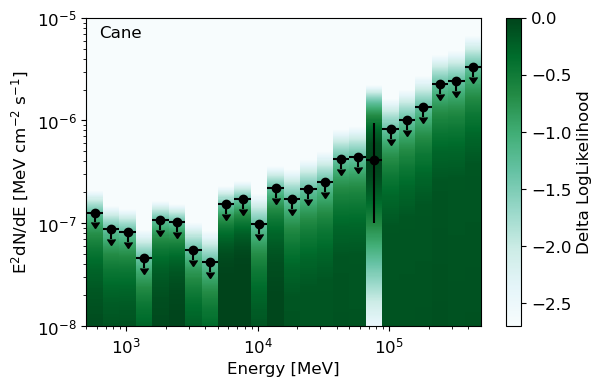

In [17]:
Image.open('P8R2_14years/Cane.png')
#Image.open('P8R2_14years/Sculptor.png')
#Image.open('P8R2_14years/Ursa_minor.png')
#Image.open('P8R2_14years/Wilma_1.png')



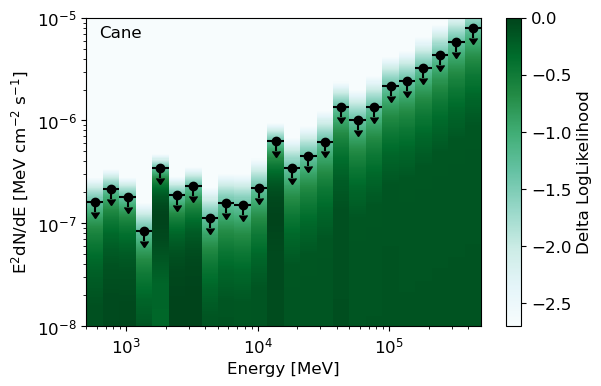

In [19]:
Image.open('P8R2/canes.png')


## Comparar os loglikelihoods nesses bins

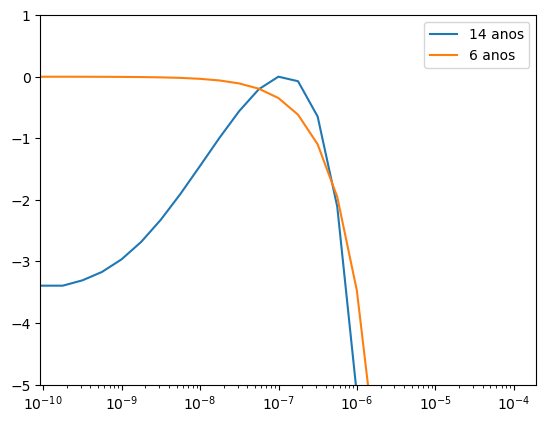

In [30]:
# Comparando os bins de numero 18

plt.plot(Cane_14years_eflux[17] ,Cane_14years_dlog[17] - Cane_14years_dlog[17].max(), label ='14 anos')
plt.plot(Cane_6years_eflux[17],Cane_6years_dlog[17] - Cane_6years_dlog[17].max(), label = '6 anos')
plt.gca().set_ylim(-5,1)
plt.xscale('log')
plt.legend()

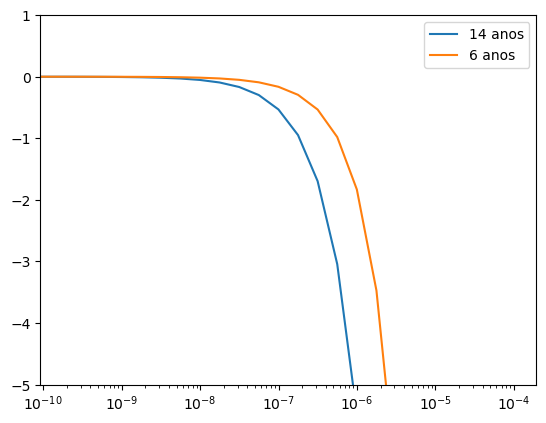

In [31]:


plt.plot(Cane_14years_eflux[18] ,Cane_14years_dlog[18] - Cane_14years_dlog[18].max(), label ='14 anos')
plt.plot(Cane_6years_eflux[18],Cane_6years_dlog[18] - Cane_6years_dlog[18].max(), label = '6 anos')
plt.gca().set_ylim(-5,1)
plt.xscale('log')
plt.legend()

In [28]:
Cane_6years_eflux[17].max()

9.965565580000021e-05

## Como um bin de energia influência o limite de Seção de choque??

Para calcular seção de choque precisamos fazer o seguinte:
    
    - Calular o eflux integrando o espectro de energia.
    - Este calculo é feito em cada bin, podemos associar o fluxo de energia esperado a uma chi-quadrada
    - Ao somar tudo, temos uma chi loglikehood global, onde podemos estimar um limite de seção de choque, ja que não foi detectado nenhuma fonte
    
     - Dessa forma, é natural, que se tenha detecção em certo bins o curva de likelihood global seja mais deslocada para a direita, levando a uma seção de choque mais alta 
     
Para analisar a influência desse sinal, acredito que devo comparar as curvas individualmente e tirar minhas conclusões.

In [38]:
crossesctions = np.loadtxt('limits_bb.txt',unpack=True)
mass = crossesctions[0]

In [59]:
#Canes
Canes_six_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/crossection_mass_Canes.txt')
Canes_lnl_six_years_P8R2 = np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_Canes.txt')
#Sculptor
Sculptor_six_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/crossection_mass_Sculptor.txt')
Sculptor_lnl_six_years_P8R2 = np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_Sculptor.txt')
#Segue_1
Segue_1_six_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/crossection_mass_Segue_1.txt')
Segue_1_lnl_six_years_P8R2 = np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_Segue_1.txt')
#Ursa_minor
Ursa_minor_six_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/crossection_mass_Ursa_Minor.txt')
Ursa_minor_lnl_six_years_P8R2=np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_Ursa_Minor.txt')
#Wilma_1
Wilma_1_six_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/crossection_mass_Wilma.txt')
Wilma_1_lnl_six_years_P8R2=np.loadtxt('Crossections_and_loglkes_files/Upper_limits_6years_P8R2/lnl_fermi_scan_Wilma.txt')

In [58]:
#Canes
Canes_14_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/crossection_mass_Canes.txt')
Canes_lnl_14_years_P8R2 = np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/lnl_fermi_scan_Canes.txt')
#Sculptor
Sculptor_14_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/crossection_mass_Sculptor.txt')
Sculptor_lnl_14_years_P8R2 = np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/lnl_fermi_scan_Sculptor.txt')
#Segue_1
Segue_1_14_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/crossection_mass_Segue_1.txt')
Segue_1_lnl_14_years_P8R2 = np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/lnl_fermi_scan_Segue_1.txt')
#Ursa_minor
Ursa_minor_14_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/crossection_mass_Ursa_minor.txt')
Ursa_minor_lnl_14_years_P8R2=np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/lnl_fermi_scan_Ursa_minor.txt')
#Wilma_1
Wilma_1_14_years_P8R2 =  np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/crossection_mass_Wima_1.txt')
Wilma_1_lnl_14_years_P8R2=np.loadtxt('Crossections_and_loglkes_files/Upper_limits_14years_P8R2/lnl_fermi_scan_Wima_1.txt')

In [37]:
#Canes
Crossections_canes_6years =  np.zeros(len(Canes_six_years_P8R2))
Crossections_canes_14years =  np.zeros(len(Canes_six_years_P8R2))
for i in range(len(Canes_six_years_P8R2)):
    Crossections_canes_6years[i] = utils.get_parameter_limits(Canes_six_years_P8R2[i],Canes_lnl_six_years_P8R2[i])['ul']
    Crossections_canes_14years[i] = utils.get_parameter_limits(Canes_14_years_P8R2[i],Canes_lnl_14_years_P8R2[i])['ul']

In [60]:
#Sculptor
Crossections_Sculptor_6years =  np.zeros(len(Canes_six_years_P8R2))
Crossections_Sculptor_14years =  np.zeros(len(Canes_six_years_P8R2))
for i in range(len(Canes_six_years_P8R2)):
    Crossections_Sculptor_6years[i] = utils.get_parameter_limits(Sculptor_six_years_P8R2[i],Sculptor_lnl_six_years_P8R2[i])['ul']
    Crossections_Sculptor_14years[i] = utils.get_parameter_limits(Sculptor_14_years_P8R2[i],Sculptor_lnl_14_years_P8R2[i])['ul']

In [62]:
#Segue_1
Crossections_Segue_1_6years =  np.zeros(len(Canes_six_years_P8R2))
Crossections_Segue_1_14years =  np.zeros(len(Canes_six_years_P8R2))
for i in range(len(Canes_six_years_P8R2)):
    Crossections_Segue_1_6years[i] = utils.get_parameter_limits(Segue_1_six_years_P8R2[i],Segue_1_lnl_six_years_P8R2[i])['ul']
    Crossections_Segue_1_14years[i] = utils.get_parameter_limits(Segue_1_14_years_P8R2[i],Segue_1_lnl_14_years_P8R2[i])['ul']

In [50]:
#Ursa_minor
Crossections_Ursa_minor_6years =  np.zeros(len(Canes_six_years_P8R2))
Crossections_Ursa_minor_14years =  np.zeros(len(Canes_six_years_P8R2))
for i in range(len(Canes_six_years_P8R2)):
    Crossections_Ursa_minor_6years[i] = utils.get_parameter_limits(Segue_1_six_years_P8R2[i],Segue_1_lnl_six_years_P8R2[i])['ul']
    Crossections_Ursa_minor_14years[i] = utils.get_parameter_limits(Ursa_minor_14_years_P8R2[i],Ursa_minor_lnl_14_years_P8R2[i])['ul']

In [51]:
#Wilma_1
Crossections_Wilma_6years =  np.zeros(len(Canes_six_years_P8R2))
Crossections_Wilma_14years =  np.zeros(len(Canes_six_years_P8R2))
for i in range(len(Canes_six_years_P8R2)):
    Crossections_Wilma_6years[i] = utils.get_parameter_limits(Wilma_1_six_years_P8R2[i],Wilma_1_lnl_six_years_P8R2[i])['ul']
    Crossections_Wilma_14years[i] = utils.get_parameter_limits(Wilma_1_14_years_P8R2[i],Wilma_1_lnl_14_years_P8R2[i])['ul']

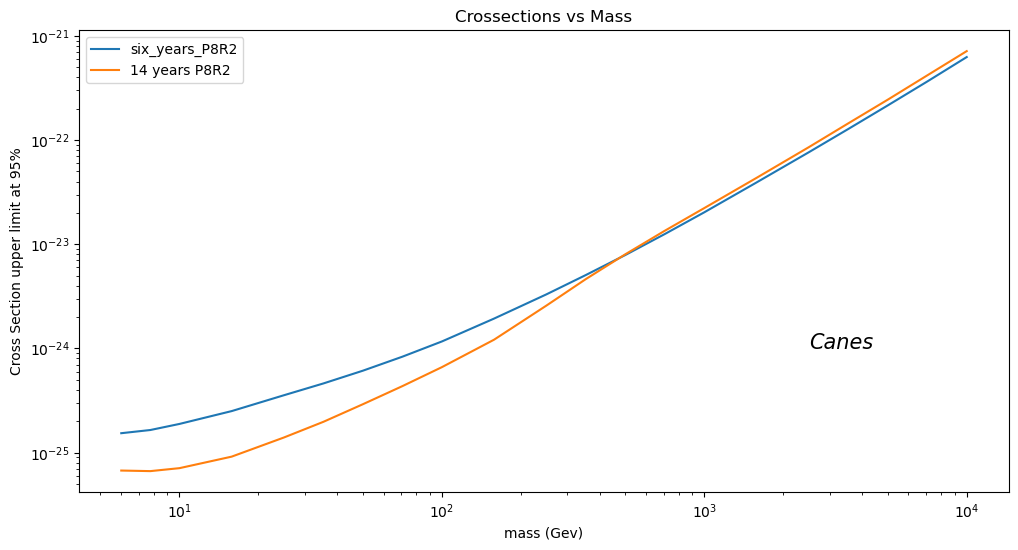

In [41]:
fig =plt.figure(figsize=(12,6))
plt.plot(mass,Crossections_canes_6years,label= 'six_years_P8R2')
plt.plot(mass,Crossections_canes_14years, label = '14 years P8R2')
plt.xlabel('mass (Gev)')
plt.ylabel('Cross Section upper limit at 95%')
plt.title('Crossections vs Mass')
plt.xscale('log')
plt.yscale('log')
plt.text(2.5e3,1e-24,'Canes', style='oblique',fontsize='15')
plt.legend()

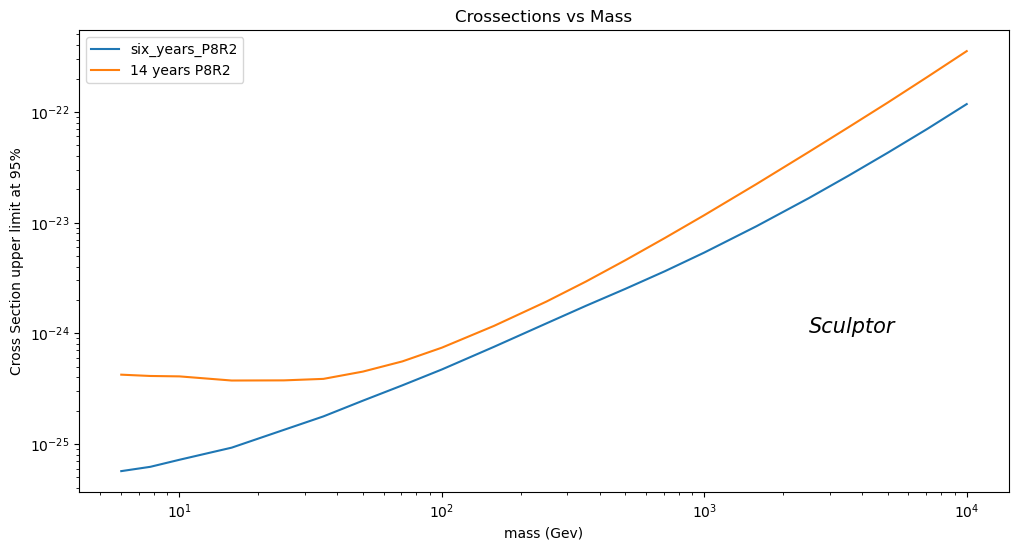

In [52]:
fig =plt.figure(figsize=(12,6))
plt.plot(mass,Crossections_Sculptor_6years,label= 'six_years_P8R2')
plt.plot(mass,Crossections_Sculptor_14years, label = '14 years P8R2')
plt.xlabel('mass (Gev)')
plt.ylabel('Cross Section upper limit at 95%')
plt.title('Crossections vs Mass')
plt.xscale('log')
plt.yscale('log')
plt.text(2.5e3,1e-24,'Sculptor', style='oblique',fontsize='15')
plt.legend()

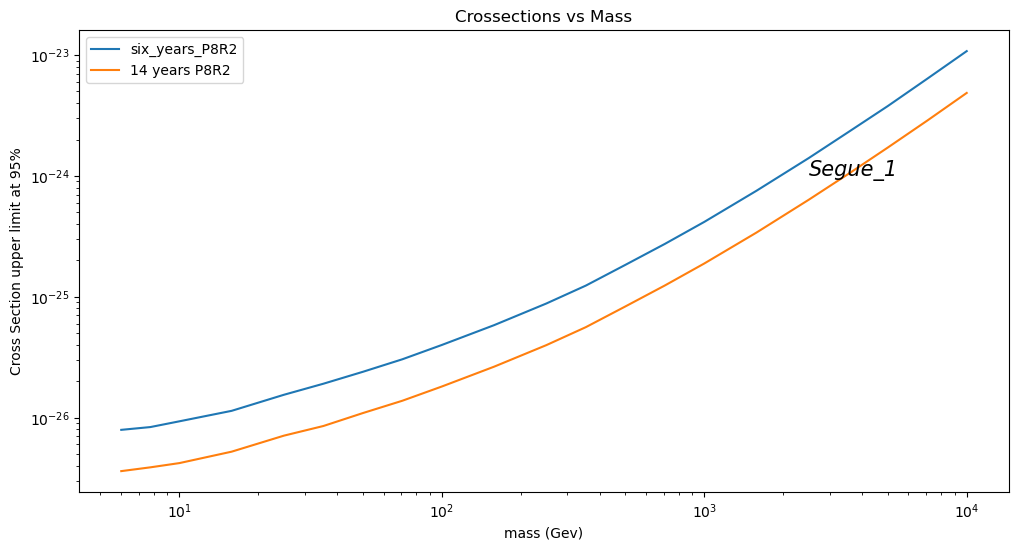

In [63]:
fig =plt.figure(figsize=(12,6))
plt.plot(mass,Crossections_Segue_1_6years,label= 'six_years_P8R2')
plt.plot(mass,Crossections_Segue_1_14years, label = '14 years P8R2')
plt.xlabel('mass (Gev)')
plt.ylabel('Cross Section upper limit at 95%')
plt.title('Crossections vs Mass')
plt.xscale('log')
plt.yscale('log')
plt.text(2.5e3,1e-24,'Segue_1', style='oblique',fontsize='15')
plt.legend()

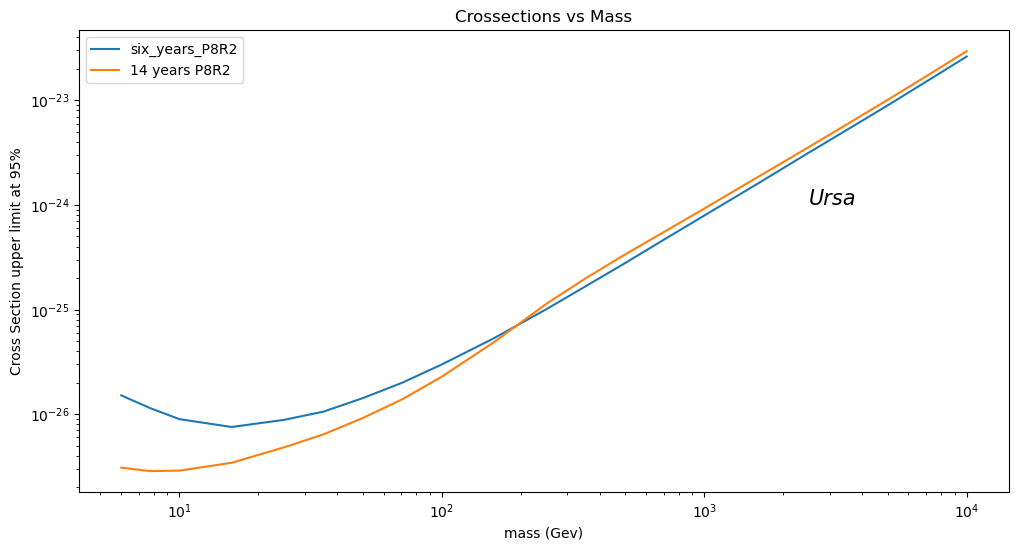

In [53]:
fig =plt.figure(figsize=(12,6))
plt.plot(mass,Crossections_Ursa_minor_6years,label= 'six_years_P8R2')
plt.plot(mass,Crossections_Ursa_minor_14years, label = '14 years P8R2')
plt.xlabel('mass (Gev)')
plt.ylabel('Cross Section upper limit at 95%')
plt.title('Crossections vs Mass')
plt.xscale('log')
plt.yscale('log')
plt.text(2.5e3,1e-24,'Ursa', style='oblique',fontsize='15')
plt.legend()

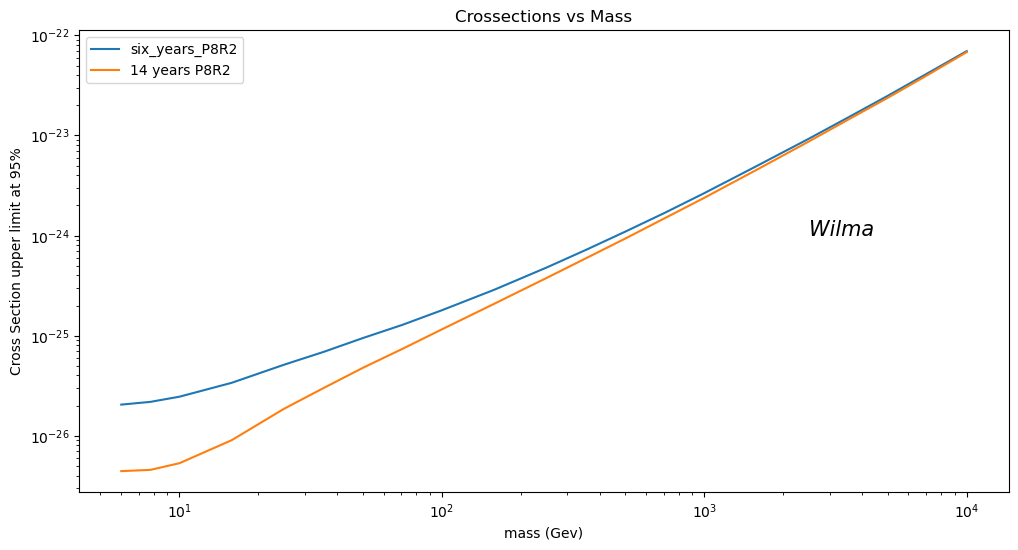

In [55]:
fig =plt.figure(figsize=(12,6))
plt.plot(mass,Crossections_Wilma_6years,label= 'six_years_P8R2')
plt.plot(mass,Crossections_Wilma_14years, label = '14 years P8R2')
plt.xlabel('mass (Gev)')
plt.ylabel('Cross Section upper limit at 95%')
plt.title('Crossections vs Mass')
plt.xscale('log')
plt.yscale('log')
plt.text(2.5e3,1e-24,'Wilma', style='oblique',fontsize='15')
plt.legend()

In [ ]:
Crossections_canes_6years =  np.zeros(len(Canes_six_years_P8R2))
Crossections_canes_14years =  np.zeros(len(Canes_six_years_P8R2))
for i in range(len(Canes_six_years_P8R2)):
    Crossections_canes_6years[i] = utils.get_parameter_limits(Canes_six_years_P8R2[i],Canes_lnl_six_years_P8R2[i])['ul']
    Crossections_canes_14years[i] = utils.get_parameter_limits(Canes_14_years_P8R2[i],Canes_lnl_14_years_P8R2[i])['ul']